In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df2 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df3 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")
df4 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", encoding="cp1252")
df5 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df7 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df8 = pd.read_csv("data/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

In [3]:
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]

print(f"Data dimensions:")
for i, data in enumerate(df_list, start = 1):
    rows, cols = data.shape
    print(f"Data{i} => {rows} rows, {cols} cols")

Data dimensions:
Data1 => 529918 rows, 79 cols
Data2 => 445909 rows, 79 cols
Data3 => 692703 rows, 79 cols
Data4 => 170366 rows, 79 cols
Data5 => 288602 rows, 79 cols
Data6 => 191033 rows, 79 cols
Data7 => 225745 rows, 79 cols
Data8 => 286467 rows, 79 cols


In [4]:
data = pd.concat(df_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [5]:
for df in df_list: del df

In [6]:
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [7]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [9]:
pd.options.display.max_rows = 85

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


/home/kostas/Documents/git/Magistrinis/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/kostas/Documents/git/Magistrinis/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [10]:
pd.options.display.max_columns = 85
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.000000e+06,5.000000e+05,4.000000,0.000000,4,4,4,4.000000,0.000000,4,4,0,0.000000,0.000000,0,0,0,0,0,0,40,0,5.000000e+05,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,6.666667e+05,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,6.666667e+05,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,4344,0,1856.859649,972.796621,5.464196e+05,5.404441e+02,1867.952381,7207.469062,53438,1,196135,4086.145833,10366.095180,53521,1,172901,3087.517857,9307.416597,53438,2,0,0,0,0,1252,1832,2.498279e+02,290.616157,0,4344,1001.607477,1160.591064,1346971.618,0,0,0,1,0,0,0,0,1,1011.056604,27.163265,1856.859649,1252,0,0,0,0,0,0,49,1331,57,105841,29200,61,31,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,2896,0,1769.372881,848.453540,2.793639e+05,2.853942e+02,3536.672897,18326.251010,173388,0,378424,7883.833333,34491.462460,236489,2,355402,6127.620690,27253.356700,196547,1,0,0,0,0,1264,189

## Duomenų paruošimas

### Ištrinamos pasikartojančios vertės

In [11]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [12]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

In [13]:
data = data.reset_index()
data.drop('index', axis=1, inplace=True)

### Pakeičiamos trūkstamos ir begalinės vertės

In [14]:
pd.options.display.max_rows = 85
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [15]:
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [16]:
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [17]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [18]:
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


### Trūkstamų verčių vizualizacija

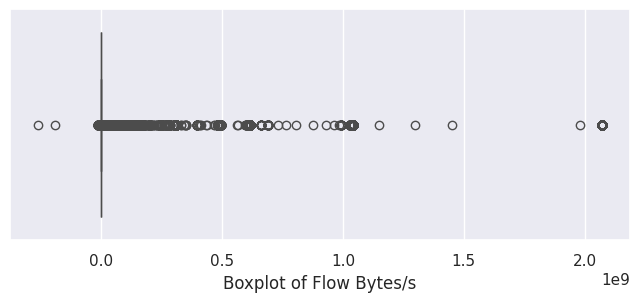

In [19]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

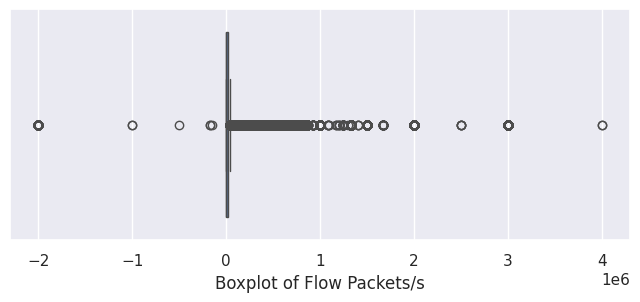

In [20]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

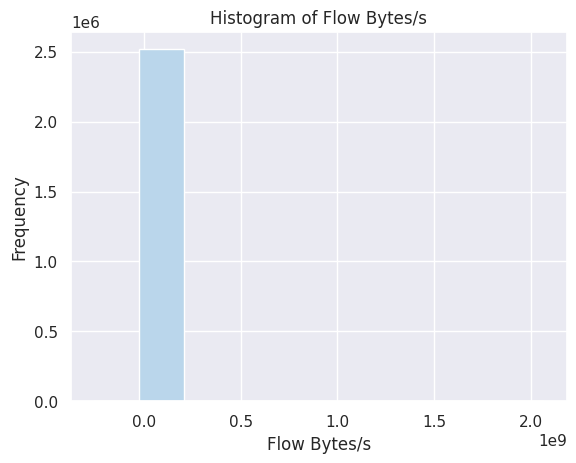

In [21]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

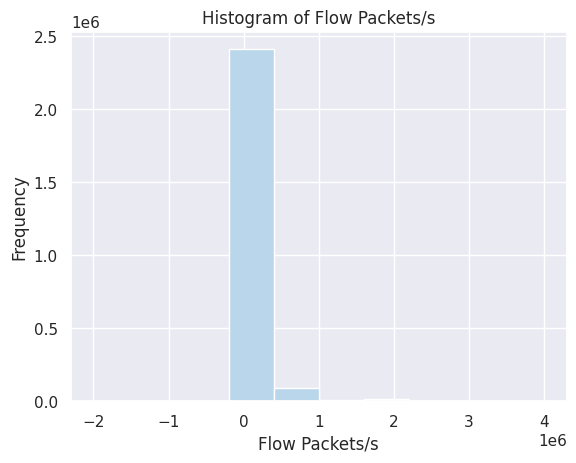

In [22]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [23]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [24]:
# Trūkstamos vertės pakeičiamos mediana
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

/tmp/ipykernel_844721/3450379762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
/tmp/ipykernel_844721/3450379762.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [25]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


## Duomenų analizė ir vizualizacija

In [27]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack ï¿½ Brute Force', 'Web Attack ï¿½ XSS',
       'Web Attack ï¿½ Sql Injection', 'Infiltration', 'Bot', 'DDoS',
       'PortScan'], dtype=object)

In [28]:
data['Label'].value_counts()

Label
BENIGN                          2096484
DoS Hulk                         172849
DDoS                             128016
PortScan                          90819
DoS GoldenEye                     10286
FTP-Patator                        5933
DoS slowloris                      5385
DoS Slowhttptest                   5228
SSH-Patator                        3219
Bot                                1953
Web Attack ï¿½ Brute Force         1470
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed                           11
Name: count, dtype: int64

In [29]:
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack – Brute Force': 'Web Attack',
    'Web Attack – XSS': 'Web Attack',
    'Web Attack – Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

data['Attack Type'] = data['Label'].map(attack_map)

In [30]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [31]:
data.drop('Label', axis = 1, inplace = True)

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 3 7]


In [33]:
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: nan


In [34]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

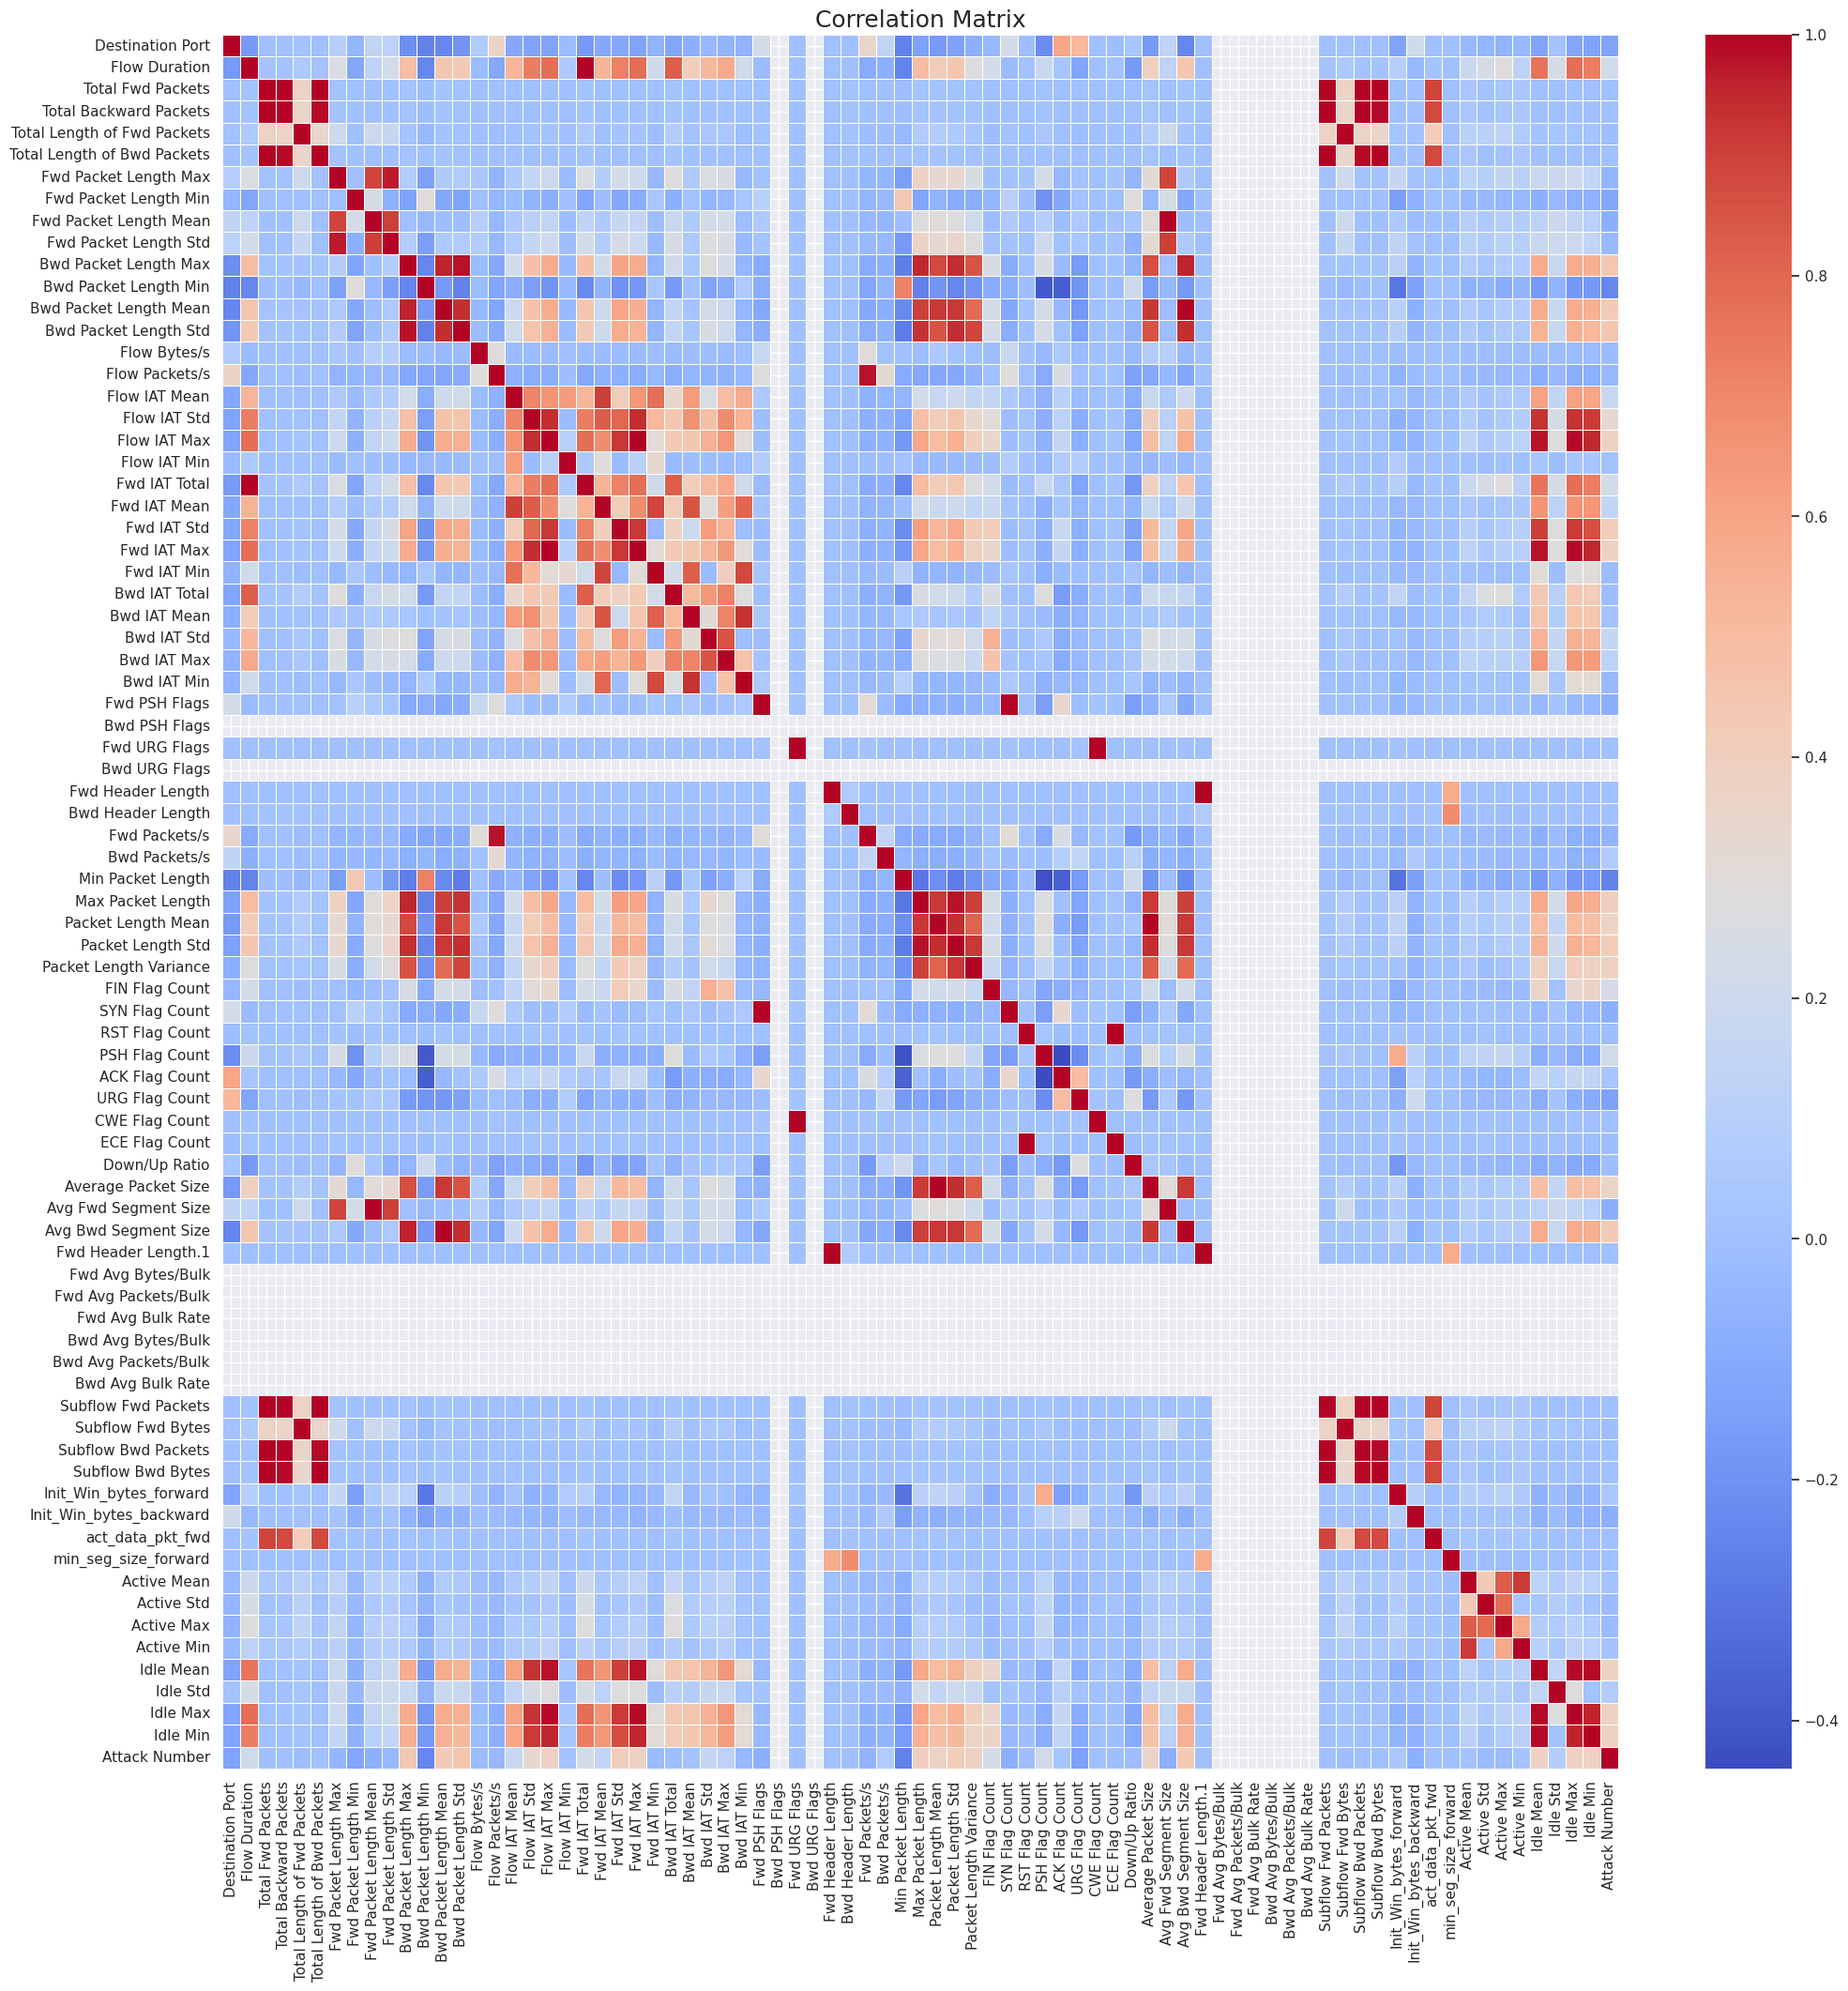

In [35]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [36]:
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print(f'{i:<3} {feature:<24} :{corr_value}')

Features with positive correlation with 'Attack Number':

1   Flow Duration            :0.21
2   Bwd Packet Length Max    :0.44
3   Bwd Packet Length Mean   :0.43
4   Bwd Packet Length Std    :0.45
5   Flow IAT Mean            :0.17
6   Flow IAT Std             :0.33
7   Flow IAT Max             :0.38
8   Flow IAT Min             :0.01
9   Fwd IAT Total            :0.22
10  Fwd IAT Mean             :0.15
11  Fwd IAT Std              :0.41
12  Fwd IAT Max              :0.38
13  Bwd IAT Mean             :0.01
14  Bwd IAT Std              :0.16
15  Bwd IAT Max              :0.12
16  Bwd Packets/s            :0.07
17  Max Packet Length        :0.4
18  Packet Length Mean       :0.37
19  Packet Length Std        :0.41
20  Packet Length Variance   :0.38
21  FIN Flag Count           :0.23
22  PSH Flag Count           :0.21
23  ACK Flag Count           :0.03
24  Average Packet Size      :0.36
25  Avg Bwd Segment Size     :0.43
26  Init_Win_bytes_forward   :0.04
27  Active Mean              :0.0

In [37]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [38]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [39]:
print(f"Unique value count:")
for i, feature in enumerate(list(data.columns), start = 1):
    print(f"{i:<3}. {feature:<30} {data[feature].nunique()}")

Unique value count:
1  . Destination Port               53805
2  . Flow Duration                  1050899
3  . Total Fwd Packets              1432
4  . Total Backward Packets         1747
5  . Total Length of Fwd Packets    17928
6  . Total Length of Bwd Packets    64698
7  . Fwd Packet Length Max          5279
8  . Fwd Packet Length Min          384
9  . Fwd Packet Length Mean         99716
10 . Fwd Packet Length Std          253909
11 . Bwd Packet Length Max          4838
12 . Bwd Packet Length Min          583
13 . Bwd Packet Length Mean         147614
14 . Bwd Packet Length Std          248869
15 . Flow Bytes/s                   1593908
16 . Flow Packets/s                 1240164
17 . Flow IAT Mean                  1166311
18 . Flow IAT Std                   1056642
19 . Flow IAT Max                   580289
20 . Flow IAT Min                   136316
21 . Fwd IAT Total                  493098
22 . Fwd IAT Mean                   737737
23 . Fwd IAT Std                    700313
24 .

### Stulpelių tarpusavio priklausomybės

/tmp/ipykernel_844721/2166185087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


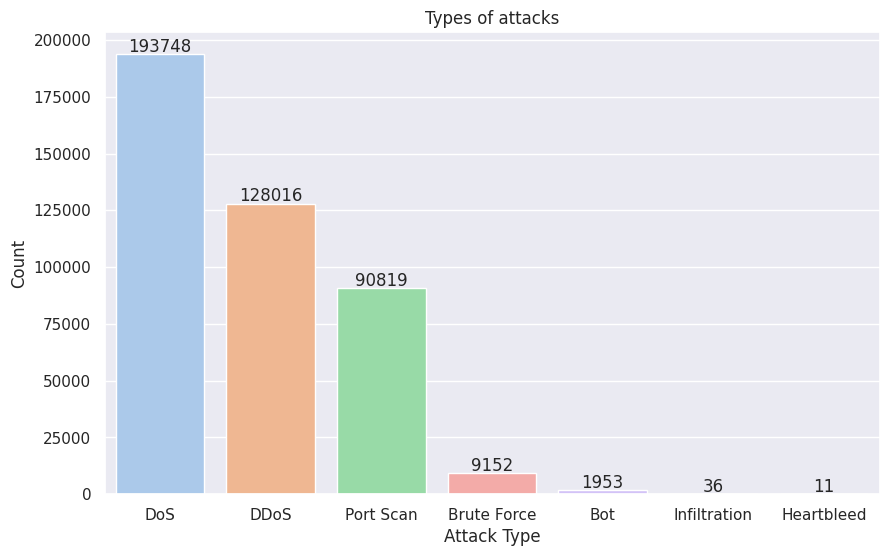

In [40]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

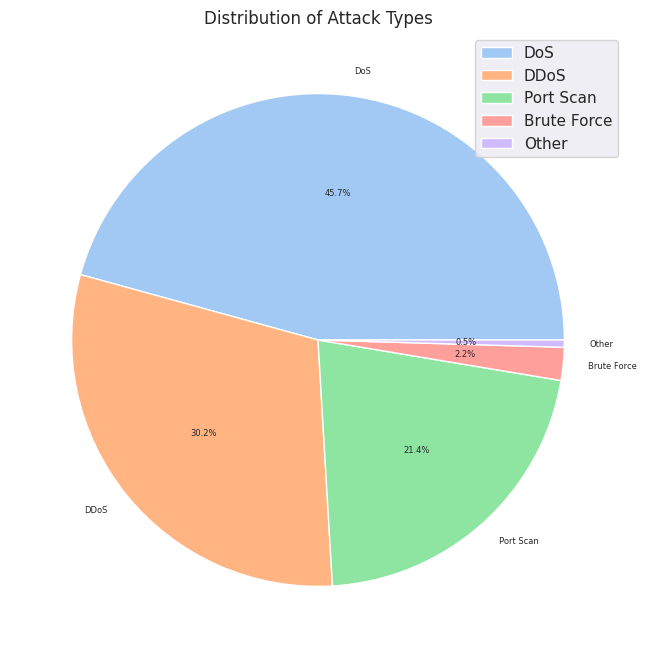

In [41]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

## Duomenų paruošimas apmokymui

In [42]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [43]:
data.shape

(2522362, 72)

In [44]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [45]:
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [46]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.08%


In [47]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [48]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.390982,-0.054143,0.569871,0.608011,3.748798,0.193171,-0.016738,-0.214742,-0.249620,1.072879,0.027763,0.072723,1.631160,0.341983,-0.651582,-0.216180,-0.021840,0.855596,-0.994024,-0.525287,-0.228545,0.407670,-1.325318,-1.150476,0.435459,-0.204177,0.695499,0.174348,-0.517996,1.452897,-0.154540,0.264153,0.000867,0.002640,-0.013647,BENIGN
1,-2.913874,-0.069281,0.888962,1.462702,8.890879,0.517605,-0.061198,1.116155,1.970122,-2.750201,-0.938350,-0.856509,6.063196,1.652494,-4.437396,0.466846,0.130118,2.740400,-1.207840,-1.210883,0.451935,-0.148473,-3.121043,-4.344714,-0.739095,1.652721,0.215535,-0.018186,-2.542482,2.117326,-0.645031,0.561905,0.025716,0.000739,-0.014409,BENIGN
2,-2.449936,-0.055864,0.606191,0.704897,4.325622,0.227442,-0.021849,-0.068708,-0.002553,0.652059,-0.079223,-0.029984,2.126999,0.487366,-1.070273,-0.141555,-0.005147,1.065715,-1.020594,-0.602204,-0.154098,0.344872,-1.526373,-1.505960,0.300865,0.000080,0.645756,0.156365,-0.731547,1.527867,-0.206173,0.295603,0.003446,0.002439,-0.013475,BENIGN
3,-2.914728,-0.069319,0.889828,1.464623,8.896360,0.515828,-0.061368,1.114312,1.970551,-2.746234,-0.937989,-0.855968,6.066586,1.652264,-4.435441,0.465579,0.129926,2.741097,-1.210653,-1.211622,0.450773,-0.149477,-3.122573,-4.345282,-0.743183,1.650657,0.219121,-0.014776,-2.531090,2.118470,-0.642165,0.560272,0.025535,0.000749,-0.014153,BENIGN
4,-1.538079,0.080214,-0.489896,0.320052,-0.525545,0.755012,0.100982,0.728663,-1.141561,-0.572128,-0.042364,-0.208805,-0.431530,0.059057,-0.612119,-0.182699,-0.043888,-0.489064,-0.072386,0.193815,-0.115322,-0.055062,0.235422,-0.018365,-0.128519,-0.399098,-0.222969,-0.786190,0.351384,0.858741,-0.177655,-0.244752,-0.026103,0.000919,0.023893,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,2.144859,0.481133,-4.455229,-0.672878,-0.852901,-0.012173,0.123053,2.525833,-0.148120,-0.235562,0.046696,-0.249393,0.572654,-0.192795,0.774851,0.123016,0.006104,-0.112836,-0.022059,-0.336258,0.263491,0.242876,-0.503498,-0.053042,0.982795,0.736584,-0.826301,-0.249917,0.887389,0.145301,-0.617034,1.137770,0.085401,0.000059,-0.070432,BENIGN
2522358,1.697963,0.454502,-3.989643,-0.542583,-0.883523,0.069359,0.122681,2.347480,-0.268457,-0.277783,0.041138,-0.244664,0.488641,-0.177984,0.666306,0.143522,0.009954,-0.173435,0.067951,-0.300839,0.221729,0.313080,-0.406489,-0.090898,0.939401,0.813598,-0.841382,-0.221025,0.956197,0.165558,-0.698730,1.311585,0.111577,-0.000312,-0.144978,BENIGN
2522359,2.609136,0.611258,-4.957339,-0.817781,-0.867009,-0.148814,0.121836,2.755013,0.054102,-0.234418,0.043365,-0.260593,0.708477,-0.224559,0.916940,0.140657,0.010039,-0.054440,-0.065046,-0.461878,0.286082,0.245899,-0.525752,0.006991,1.089176,0.792172,-0.899377,-0.200652,1.133864,0.154579,-0.898908,1.752596,0.131427,-0.000026,-0.185010,BENIGN
2522360,1.692654,0.461977,-4.001746,-0.542292,-0.883119,0.062613,0.122562,2.357249,-0.257405,-0.281476,0.039669,-0.245614,0.496399,-0.177366,0.662463,0.147661,0.010849,-0.172396,0.074356,-0.313148,0.220483,0.325994,-0.392345,-0.081028,0.949935,0.821831,-0.855560,-0.214525,0.983535,0.169449,-0.726348,1.370809,0.115764,-0.000299,-0.154294,BENIGN


# Apmokymas

In [53]:
# For cross validation
from sklearn.model_selection import cross_val_score

## Binarinis klasifikavimas

In [50]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
0    7536
1    7464
Name: count, dtype: int64


In [51]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### Logistinė regresija

In [54]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9977777777777778, 0.9991111111111111, 0.9973333333333333, 0.9977777777777778, 0.9973333333333333

Mean cross-validation score: 1.00


In [55]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)

Logistic Regression Model 1 coefficients:
[ 6.82548526e-01 -3.05146856e-02 -6.94852123e-01 -7.79300430e-01
  5.59119258e-01  3.01523012e-01  2.04677972e-02  1.17639057e-01
 -5.44559934e-01  3.15359933e-01  7.64603190e-02 -9.02552603e-04
 -1.15736056e-01  2.43463462e-01 -3.98025531e-01  6.10620562e-01
  8.79561754e-02 -1.04531061e+00  1.00161857e+00  1.89899892e+00
 -1.18425835e+00  8.50734652e-01  1.80458469e+00 -6.29531782e-01
 -1.59226582e+00 -3.97362011e-01  2.18921489e+00  1.29147628e+00
 -1.04977235e+00 -1.43181616e-01  1.42667666e-01  5.46142336e-01
  2.28557508e-02  7.38258623e-04  2.69751327e-02]

Logistic Regression Model 1 intercept: -2.9160826160515785


In [56]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 1.0, 1.0, 1.0, 0.9995555555555555, 1.0

Mean cross-validation score: 1.00


In [57]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

Logistic Regression Model 2 coefficients:
[ 9.61069774e-01 -8.73463039e-02 -1.24515558e+00 -1.34430617e+00
  8.88044202e-01  4.78887962e-01  2.80192663e-02  1.11854988e-01
 -9.97057852e-01  5.21031177e-01  1.47336851e-01 -1.53439911e-02
  4.75704528e-03  4.08266467e-01 -1.03116451e+00  1.28168863e+00
  1.89490276e-01 -2.03373795e+00  2.01930963e+00  3.93801720e+00
 -2.49419265e+00  1.62489278e+00  3.83252974e+00 -1.33441404e+00
 -3.60492278e+00 -8.64622198e-01  5.54838090e+00  3.42669052e+00
 -2.08966677e+00  5.54394551e-01  3.61742381e-01  1.21794555e+00
  4.24094963e-02  2.14466931e-03  3.51877746e-01]

Logistic Regression Model 2 intercept: -3.9037068878549888


### Atraminių vektorių mašina

In [58]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 0.9826666666666667, 0.9795555555555555, 0.9853333333333333, 0.9817777777777777, 0.9764444444444444

Mean cross-validation score: 0.98


In [59]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 0.9973333333333333, 0.996, 0.9964444444444445, 0.9964444444444445, 0.9964444444444445

Mean cross-validation score: 1.00


In [60]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -0.8835320474938073
SVM Model 2 intercept: -0.45137944211132197


## Daugiaklasis klasifikavimas

In [61]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [62]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Bot            1953
Name: count, dtype: int64

In [65]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Port Scan      5000
DDoS           5000
DoS            5000
BENIGN         5000
Bot            5000
Brute Force    5000
Name: count, dtype: int64

In [66]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.976, 0.9735555555555555, 0.9686666666666667, 0.9746666666666667, 0.9706666666666667

Mean cross-validation score: 0.97


In [68]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9948888888888889, 0.9962222222222222, 0.9948888888888889, 0.9962222222222222, 0.9948888888888889

Mean cross-validation score: 1.00


### Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.9744444444444444, 0.9733333333333334, 0.9697777777777777, 0.9715555555555555, 0.9704444444444444

Mean cross-validation score: 0.97


In [70]:
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.9897777777777778, 0.9926666666666667, 0.9893333333333333, 0.9911111111111112, 0.9877777777777778

Mean cross-validation score: 0.99


### K Nearest Neighbours

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9882222222222222, 0.9915555555555555, 0.9888888888888889, 0.9882222222222222, 0.9882222222222222

Mean cross-validation score: 0.99


In [72]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9928888888888889, 0.9933333333333333, 0.9928888888888889, 0.9917777777777778, 0.9911111111111112

Mean cross-validation score: 0.99
